# Assignment 1 Data Science FIT1043
## Name: Ekramul Islam
### ID: 33275548

In [231]:
import pandas as pd
import matplotlib.pylab as plt
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np

# A1. DataSet Size

In [232]:
smartcard = pd.read_csv('monthly_smartcard_replacements.csv')
smartcard

,Month,Transaction,Smartcard.Type,Action.Reason,Number.of.transactions
0,2019-03,Replace Smartcard,Photo Identification Card,Change Customer Details,156
1,2019-03,Replace Smartcard,Driver Licence Card,Destroyed,110
2,2019-03,Replace Smartcard,Industry Authority Card,Lost In Mail - Imu,48
3,2019-03,Replace Smartcard,Marine Licence Ind Card,Managers Approval,8
4,2019-03,Replace Smartcard,Marine Licence Ind Card,Lost In Mail - Imu,7
...,...,...,...,...,...
5787,2020-11,Replace Smartcard,Photo Identification Card,Remove Gender From Smartcard,1
5788,2020-12,Replace Smartcard,Marine Licence Ind Card,Stolen,1
5789,2021-07,Replace Smartcard,Marine Licence Ind Card,Stolen,1
5790,2021-07,Replace Smartcard,Photo Identification Card,Merged,1


# A2. Missing values in the dataset

In [233]:
smartcard.isnull().sum()

Month                     0
Transaction               0
Smartcard.Type            0
Action.Reason             0
Number.of.transactions    0
dtype: int64

# A3. Data Types

In [234]:
smartcard.dtypes

Month                     object
Transaction               object
Smartcard.Type            object
Action.Reason             object
Number.of.transactions     int64
dtype: object

# A4. Convert Data Type

In [235]:
smartcard ['Month'] = pd.to_datetime(smartcard['Month'])
smartcard

,Month,Transaction,Smartcard.Type,Action.Reason,Number.of.transactions
0,2019-03-01,Replace Smartcard,Photo Identification Card,Change Customer Details,156
1,2019-03-01,Replace Smartcard,Driver Licence Card,Destroyed,110
2,2019-03-01,Replace Smartcard,Industry Authority Card,Lost In Mail - Imu,48
3,2019-03-01,Replace Smartcard,Marine Licence Ind Card,Managers Approval,8
4,2019-03-01,Replace Smartcard,Marine Licence Ind Card,Lost In Mail - Imu,7
...,...,...,...,...,...
5787,2020-11-01,Replace Smartcard,Photo Identification Card,Remove Gender From Smartcard,1
5788,2020-12-01,Replace Smartcard,Marine Licence Ind Card,Stolen,1
5789,2021-07-01,Replace Smartcard,Marine Licence Ind Card,Stolen,1
5790,2021-07-01,Replace Smartcard,Photo Identification Card,Merged,1


# A5. Descriptive Statistics

In [236]:
smartcard.describe()

,Number.of.transactions
count,5792.000000
mean,303.241540
std,845.056684
min,1.000000
25%,5.000000
50%,18.000000
75%,84.000000
max,9097.000000


# A6. Exploring Smartcard Types

In [237]:
smartcard


,Month,Transaction,Smartcard.Type,Action.Reason,Number.of.transactions
0,2019-03-01,Replace Smartcard,Photo Identification Card,Change Customer Details,156
1,2019-03-01,Replace Smartcard,Driver Licence Card,Destroyed,110
2,2019-03-01,Replace Smartcard,Industry Authority Card,Lost In Mail - Imu,48
3,2019-03-01,Replace Smartcard,Marine Licence Ind Card,Managers Approval,8
4,2019-03-01,Replace Smartcard,Marine Licence Ind Card,Lost In Mail - Imu,7
...,...,...,...,...,...
5787,2020-11-01,Replace Smartcard,Photo Identification Card,Remove Gender From Smartcard,1
5788,2020-12-01,Replace Smartcard,Marine Licence Ind Card,Stolen,1
5789,2021-07-01,Replace Smartcard,Marine Licence Ind Card,Stolen,1
5790,2021-07-01,Replace Smartcard,Photo Identification Card,Merged,1


In [238]:
smartcard['Smartcard.Type'].unique()

array(['Photo Identification Card', 'Driver Licence Card',
       'Industry Authority Card', 'Marine Licence Ind Card'], dtype=object)

### 2. What is the percentage of Driver Licence Card records as one of the smartcard types in ‘Smartcard.Type’ column?

In [239]:
u = smartcard['Smartcard.Type']

In [285]:
c = u.value_counts()
c

Driver Licence Card          1896
Photo Identification Card    1631
Industry Authority Card      1218
Marine Licence Ind Card      1047
Name: Smartcard.Type, dtype: int64

In [241]:
p = u.value_counts(normalize=True)
p

Driver Licence Card          0.327348
Photo Identification Card    0.281595
Industry Authority Card      0.210290
Marine Licence Ind Card      0.180767
Name: Smartcard.Type, dtype: float64

In [242]:
pf=u.value_counts(normalize=True).mul(100).round(1).astype(str)+'%'
pf

Driver Licence Card          32.7%
Photo Identification Card    28.2%
Industry Authority Card      21.0%
Marine Licence Ind Card      18.1%
Name: Smartcard.Type, dtype: object

# A7. Exploring Reasons for Smartcard Replacement


## 1)

In [243]:
different_reasons = smartcard.groupby(["Action.Reason"]).count().reset_index()
df_new = different_reasons[['Action.Reason', 'Month']]
df_new.rename(columns = {'Month':'Instances'}, inplace = True)
df_new

,Action.Reason,Instances
0,Change Customer Details,521
1,Condition Change,364
2,Court Order Issued X3 Or X4 Condition,137
3,Da/dgd Smartcard Replacement Fee Exempt,134
4,Damaged,342
5,Defective,88
6,Destroyed,379
7,Disaster Relief,48
8,Expired,133
9,Facial Image Is Not A True Likeness,304


## 2)

In [245]:
filt = (smartcard['Action.Reason'] == 'Lost') & (smartcard['Number.of.transactions'] >= 100)
smartcard[filt]

,Month,Transaction,Smartcard.Type,Action.Reason,Number.of.transactions
12,2019-05-01,Replace Smartcard,Driver Licence Card,Lost,4907
22,2019-07-01,Replace Smartcard,Driver Licence Card,Lost,5369
23,2019-07-01,Replace Smartcard,Photo Identification Card,Lost,681
32,2019-08-01,Replace Smartcard,Photo Identification Card,Lost,641
46,2019-10-01,Replace Smartcard,Driver Licence Card,Lost,5261
...,...,...,...,...,...
5665,2017-06-01,Replace Smartcard,Photo Identification Card,Lost,509
5669,2017-07-01,Replace Smartcard,Photo Identification Card,Lost,637
5709,2018-02-01,Replace Smartcard,Driver Licence Card,Lost,3770
5735,2018-07-01,Replace Smartcard,Photo Identification Card,Lost,596


# B1. Investigating Annual Smartcard Replacements

# 1)

In [246]:
smartcard['Year']=smartcard['Month'].dt.year
smartcard

,Month,Transaction,Smartcard.Type,Action.Reason,Number.of.transactions,Year
0,2019-03-01,Replace Smartcard,Photo Identification Card,Change Customer Details,156,2019
1,2019-03-01,Replace Smartcard,Driver Licence Card,Destroyed,110,2019
2,2019-03-01,Replace Smartcard,Industry Authority Card,Lost In Mail - Imu,48,2019
3,2019-03-01,Replace Smartcard,Marine Licence Ind Card,Managers Approval,8,2019
4,2019-03-01,Replace Smartcard,Marine Licence Ind Card,Lost In Mail - Imu,7,2019
...,...,...,...,...,...,...
5787,2020-11-01,Replace Smartcard,Photo Identification Card,Remove Gender From Smartcard,1,2020
5788,2020-12-01,Replace Smartcard,Marine Licence Ind Card,Stolen,1,2020
5789,2021-07-01,Replace Smartcard,Marine Licence Ind Card,Stolen,1,2021
5790,2021-07-01,Replace Smartcard,Photo Identification Card,Merged,1,2021


# 2)

In [294]:
Trans_year=smartcard.drop(['Month','Transaction','Smartcard.Type','Action.Reason'],axis=1)
Trans_year

,Number.of.transactions,Year
0,156,2019
1,110,2019
2,48,2019
3,8,2019
4,7,2019
...,...,...
5787,1,2020
5788,1,2020
5789,1,2021
5790,1,2021


In [295]:
TY=Trans_year.groupby('Year').sum()
TY

,Number.of.transactions
Year,
2010,671
2011,68418
2012,150886
2013,145192
2014,144549
2015,151109
2016,159427
2017,165726
2018,169477


<AxesSubplot:xlabel='Year'>

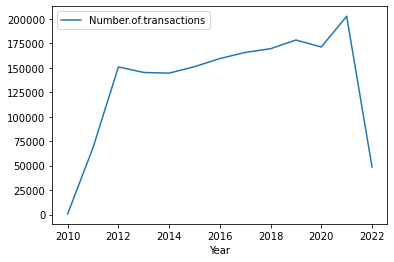

In [296]:
TY.plot()

# B2. Investigating Reasons for Smartcard Replacement

# 1)

In [281]:
df_r_bar=smartcard.drop(['Month','Transaction','Smartcard.Type','Year'], axis=1)
df_r_bar

,Action.Reason,Number.of.transactions
0,Change Customer Details,156
1,Destroyed,110
2,Lost In Mail - Imu,48
3,Managers Approval,8
4,Lost In Mail - Imu,7
...,...,...
5787,Remove Gender From Smartcard,1
5788,Stolen,1
5789,Stolen,1
5790,Merged,1


<AxesSubplot:xlabel='Action.Reason'>

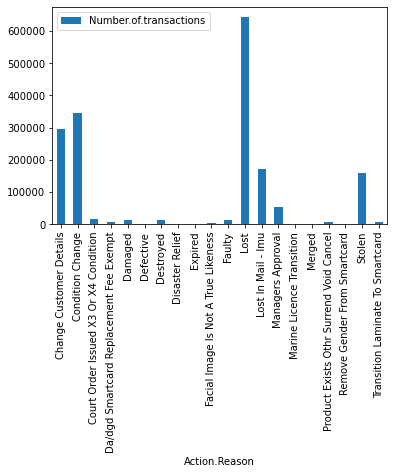

In [286]:
df5=df_r_bar.groupby('Action.Reason').sum()
df5.plot(kind='bar',rot=90)

# 2)

In [289]:
df5['Number.of.transactions'].nlargest(n=5)

Action.Reason
Lost                       642749
Condition Change           344905
Change Customer Details    294435
Lost In Mail - Imu         172552
Stolen                     158356
Name: Number.of.transactions, dtype: int64

# 3)

In [291]:
df6=smartcard.loc[(smartcard['Number.of.transactions']<2000)&(smartcard['Number.of.transactions']>1000)]
df6

,Month,Transaction,Smartcard.Type,Action.Reason,Number.of.transactions,Year
8,2019-04-01,Replace Smartcard,Driver Licence Card,Change Customer Details,1670,2019
13,2019-05-01,Replace Smartcard,Driver Licence Card,Lost In Mail - Imu,1504,2019
29,2019-09-01,Replace Smartcard,Driver Licence Card,Stolen,1183,2019
182,2012-02-01,Replace Smartcard,Driver Licence Card,Stolen,1343,2012
191,2012-03-01,Replace Smartcard,Driver Licence Card,Stolen,1421,2012
...,...,...,...,...,...,...
5710,2018-02-01,Replace Smartcard,Driver Licence Card,Change Customer Details,1847,2018
5711,2018-02-01,Replace Smartcard,Driver Licence Card,Lost In Mail - Imu,1506,2018
5720,2018-04-01,Replace Smartcard,Driver Licence Card,Change Customer Details,1705,2018
5729,2018-06-01,Replace Smartcard,Driver Licence Card,Stolen,1030,2018


# B3. Investigating reasons over annual smartcard replacement

# 1)

In [297]:
df7={'Number.of.transactions':'sum'}
df8=smartcard.groupby(['Action.Reason','Year']).agg(df7)
df8

Number.of.transactions
Action.Reason                    Year                        
Change Customer Details          2010                      84
                                 2011                   12265
                                 2012                   28446
                                 2013                   28603
                                 2014                   28188
...                                                       ...
Transition Laminate To Smartcard 2018                     410
                                 2019                     453
                                 2020                     576
                                 2021                     738
                                 2022                     156

[236 rows x 1 columns]

# 2)

In [298]:
filt=df8[df8['Number.of.transactions']>10000]
filt

Number.of.transactions
Action.Reason           Year                        
Change Customer Details 2011                   12265
                        2012                   28446
                        2013                   28603
                        2014                   28188
                        2015                   28267
                        2016                   27730
                        2017                   26837
                        2018                   27083
                        2019                   26856
                        2020                   24934
                        2021                   28593
Condition Change        2012                   18136
                        2013                   21262
                        2014                   23426
                        2015                   27316
                        2016                   33056
                        2017                   40274
                        2018                   41440
                        2019                   42143
                        2020                   38585
                        2021                   41637
                        2022                   10183
Lost                    2011                   26325
                        2012                   57727
                        2013                   52220
                        2014                   49599
                        2015                   52237
                        2016                   55953
                        2017                   56800
                        2018                   60463
                        2019                   65467
                        2020                   66765
                        2021                   79211
                        2022                   19858
Lost In Mail - Imu      2014                   14173
                        2015                   16777
                        2016                   17784
                        2017                   18667
                        2018                   18317
                        2019                   19784
                        2020                   18639
                        2021                   27262
Stolen                  2012                   17132
                        2013                   15384
                        2014                   13966
                        2015                   13561
                        2016                   14218
                        2017                   14200
                        2018                   14079
                        2019                   15150
                        2020                   13243
                        2021                   15144

In [300]:
filt.count()

Number.of.transactions    52
dtype: int64

# 3)


In [306]:
filt=df8[df8['Number.of.transactions']>10000]
filt

Number.of.transactions
Action.Reason           Year                        
Change Customer Details 2011                   12265
                        2012                   28446
                        2013                   28603
                        2014                   28188
                        2015                   28267
                        2016                   27730
                        2017                   26837
                        2018                   27083
                        2019                   26856
                        2020                   24934
                        2021                   28593
Condition Change        2012                   18136
                        2013                   21262
                        2014                   23426
                        2015                   27316
                        2016                   33056
                        2017                   40274
                        2018                   41440
                        2019                   42143
                        2020                   38585
                        2021                   41637
                        2022                   10183
Lost                    2011                   26325
                        2012                   57727
                        2013                   52220
                        2014                   49599
                        2015                   52237
                        2016                   55953
                        2017                   56800
                        2018                   60463
                        2019                   65467
                        2020                   66765
                        2021                   79211
                        2022                   19858
Lost In Mail - Imu      2014                   14173
                        2015                   16777
                        2016                   17784
                        2017                   18667
                        2018                   18317
                        2019                   19784
                        2020                   18639
                        2021                   27262
Stolen                  2012                   17132
                        2013                   15384
                        2014                   13966
                        2015                   13561
                        2016                   14218
                        2017                   14200
                        2018                   14079
                        2019                   15150
                        2020                   13243
                        2021                   15144

# 4)


array([[<AxesSubplot:title={'center':'Number.of.transactions'}>]],
      dtype=object)

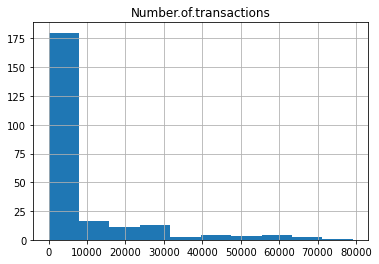

In [307]:
df8.hist()